<a href="https://colab.research.google.com/github/daniel-nuno/time_series_O2024_MAF3074N/blob/main/arima_ipc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

<br>
<br>
Clase: Series de tiempo
<br>
Actividad: ARIMA para IPC
<br>
<br>

* * *

Docente: Daniel Nuño <br>
Fecha: 11 de Noviembre 2024 <br>

* * *

<br>
<br>

# ARIMA para el índice IPC

Una serie de tiempo se define como una serie de puntos de datos registrados en diferentes intervalos de tiempo. El orden temporal puede ser diario, mensual o incluso anual.

Los pronósticos de series de tiempo es el proceso de utilizar un modelo estadístico para predecir valores futuros de una serie de tiempo basándose en resultados pasados.

Los pronósticos es el paso en el que queremos predecir los valores futuros que va a tomar la serie. Predecir una serie suele tener un enorme valor comercial.

Los pronósticos de una serie de tiempo puede dividirse en dos tipos.

- Si sólo utilizamos los valores anteriores de la serie para predecir sus valores futuros, se denomina Pronósticos Univariante.

- Si utilizamos predictores distintos de la serie (como variables exógenas) para predecirla, se denomina Pronósticos multivariante.

Este cuaderno se centra en un tipo concreto de método univariante denominado modelización ARIMA.

---

Imagina que tienes un portafolio de acciones que sigue el comportamiento del Índice de Precios y Cotizaciones. Quieres pronosticar el valor de tu portafolio 3 meses en el futuro.

- Utiliza las 30 acciones el indice por separado.
- Los datos al cierre mensuales desde el 2015.
- Para utilizar *autoArima* necesitas los datos en el formato correcto. https://nixtlaverse.nixtla.io/statsforecast/docs/models/autoets.html#read-data
- Divide tus datos en entrenamiento y prueba.
- Dos acciones: 1) calcula la diferenciación (o retornos), 2) gráfica las series diferenciadas, 3) determina si son estacionarías, 4) utiliza la prueba Dickey-Fuller test o KPSS test
- Utiliza autoarima para ajustar y evaluar tu modelo (selecciona una métrica de error que permita comparar diferentes escalas).
- Por medio de la métrica de error, visualiza la serie que mejor se ajusta y la que peor se ajusta.
- Compara los resultados de los modelos ARIMA, ETS. ¿Cuál fue mejor?

## Descarga los datos

In [1]:
import pandas as pd
import yfinance as yf

In [2]:
ticker = yf.Tickers(["LABB.MX", "VESTA.MX", "ORBIA.MX", "GFNORTEO.MX", "BBAJIOO.MX", "MEGACPO.MX",
                     "AC.MX", "GCC.MX", "GENTERA.MX", "CUERVO.MX", "AMXB.MX", "GCARSOA1.MX",
                     "KIMBERA.MX", "GMEXICOB.MX", "CHDRAUIB.MX", "GRUMAB.MX", "KOFUBL.MX",
                     "RA.MX", "BOLSAA.MX", "ALSEA.MX", "TLEVISACPO.MX", "Q.MX", "BIMBOA.MX",
                     "PINFRA.MX", "GAPB.MX", "ASURB.MX", "OMAB.MX", "CEMEXCPO.MX"])
data = ticker.history(start= '2015-01-01', end= '2023-12-31', interval='1mo')['Close']

data.head()

[*********************100%***********************]  28 of 28 completed


Ticker,AC.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,CUERVO.MX,...,KOFUBL.MX,LABB.MX,MEGACPO.MX,OMAB.MX,ORBIA.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,65.702606,37.795326,11.671397,154.705292,NaN,34.200207,15.430020,11.531770,37.656040,NaN,...,NaN,19.345699,38.958515,38.346146,33.039616,130.751785,NaN,56.302017,88.730598,23.547865
2015-02-01 00:00:00+00:00,70.285484,43.193314,11.671397,161.849319,NaN,37.858753,16.780148,13.125944,44.382278,NaN,...,NaN,13.299150,39.022583,39.573231,34.645477,138.726151,NaN,57.645134,92.414070,23.328476
2015-03-01 00:00:00+00:00,69.477180,42.006325,11.124301,162.236099,NaN,38.791321,16.133085,12.536795,41.835014,NaN,...,NaN,11.775289,42.517670,41.436150,31.765984,126.094246,NaN,56.418171,91.677376,23.035961
2015-04-01 00:00:00+00:00,69.892464,43.400570,11.737049,171.416779,NaN,36.944118,18.360481,13.335611,41.735302,NaN,...,NaN,14.749670,45.450417,42.735741,35.035069,136.695740,NaN,63.874294,101.554535,23.328476
2015-05-01 00:00:00+00:00,70.519669,43.626667,11.744343,179.291824,NaN,37.374538,16.991690,12.993212,42.756981,NaN,...,NaN,13.535471,46.048359,40.197929,37.203819,130.000092,NaN,61.688995,105.901924,22.910904


In [3]:
data.index = data.index.strftime('%Y-%m')
data.index = pd.to_datetime(data.index)
data = data.melt(ignore_index=False)
df = pd.DataFrame({"ds": data.index,
                   "y": data['value'],
                   "unique_id": data['Ticker']})
df.reset_index(drop=True, inplace=True)
df.dropna(inplace=True)
df.head()

,ds,y,unique_id
0,2015-01-01,65.702606,AC.MX
1,2015-02-01,70.285484,AC.MX
2,2015-03-01,69.477180,AC.MX
3,2015-04-01,69.892464,AC.MX
4,2015-05-01,70.519669,AC.MX


In [4]:
train = df[df.ds<'2023-01-01']
test = df[df.ds>='2023-01-01']

## Análisis ALSEA



In [5]:
accion = df[df['unique_id'] == 'ALSEA.MX']

<Axes: xlabel='ds'>

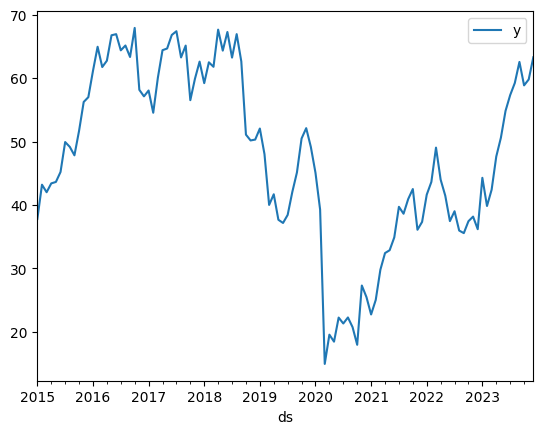

In [6]:
accion.plot(x='ds', y='y')

<Axes: ylabel='Frequency'>

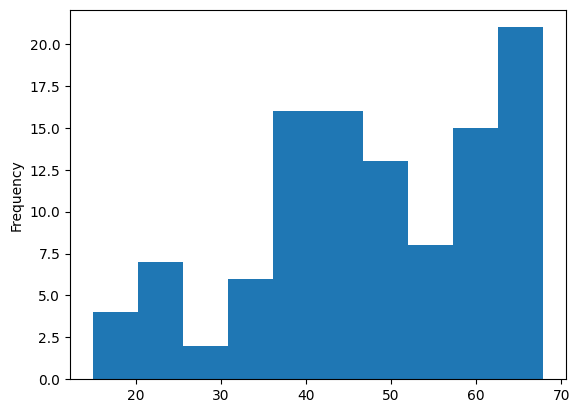

In [7]:
accion['y'].plot(kind='hist')

In [8]:
accion['y'].skew()

-0.40180996637459004

In [9]:
accion['y_diff'] = accion['y'].diff()
accion['y_ret'] = accion['y'].pct_change()
accion.dropna(inplace=True)
accion.head()

<ipython-input-9-539dd89c613c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accion['y_diff'] = accion['y'].diff()
<ipython-input-9-539dd89c613c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accion['y_ret'] = accion['y'].pct_change()
<ipython-input-9-539dd89c613c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acci

,ds,y,unique_id,y_diff,y_ret
109,2015-02-01,43.193314,ALSEA.MX,5.397987,0.142822
110,2015-03-01,42.006325,ALSEA.MX,-1.186989,-0.027481
111,2015-04-01,43.400570,ALSEA.MX,1.394245,0.033191
112,2015-05-01,43.626667,ALSEA.MX,0.226097,0.005210
113,2015-06-01,45.197701,ALSEA.MX,1.571033,0.036011


<Axes: xlabel='ds'>

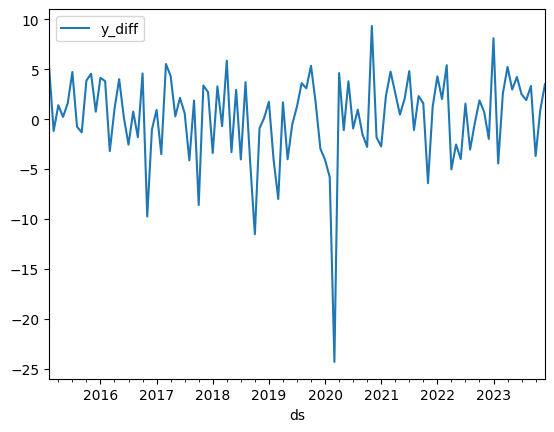

In [10]:
accion.plot(x='ds', y='y_diff')

<Axes: xlabel='ds'>

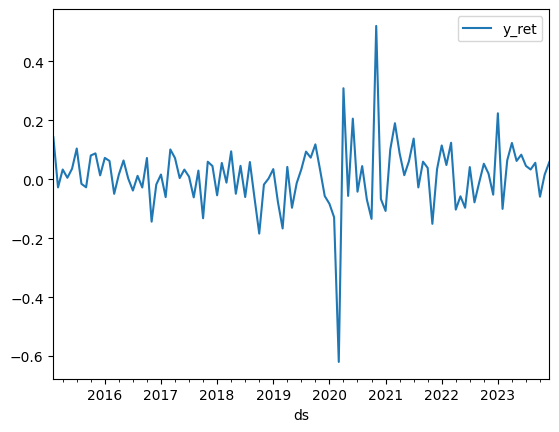

In [11]:
accion.plot(x='ds', y='y_ret')

In [12]:
accion['y_diff'].skew()

-1.8584448094673625

<Axes: ylabel='Frequency'>

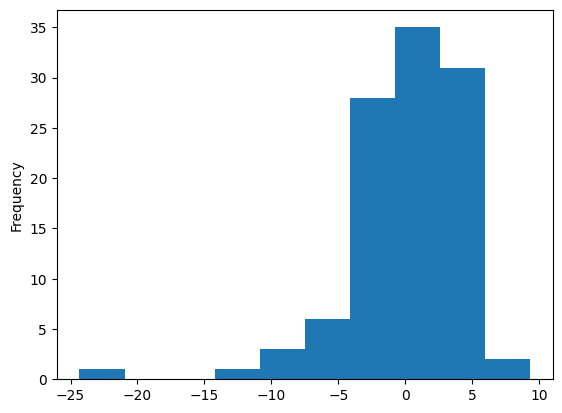

In [13]:
accion['y_diff'].plot(kind='hist')

In [14]:
from statsmodels.tsa.stattools import adfuller
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Dickey-Fuller test results for columns: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("The data is stationary")
    else:
        print("Conclusion:====>")
        print("The null hypothesis cannot be rejected")
        print("The data is not stationary")

In [15]:
Augmented_Dickey_Fuller_Test_func(accion['y_diff'], 'Diff ALSEA.MX')

Dickey-Fuller test results for columns: Diff ALSEA.MX
Test Statistic                -1.047683e+01
p-value                        1.242737e-18
No Lags Used                   0.000000e+00
Number of observations used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
The data is stationary


In [16]:
Augmented_Dickey_Fuller_Test_func(accion['y'], 'ALSEA.MX')

Dickey-Fuller test results for columns: ALSEA.MX
Test Statistic                  -1.464265
p-value                          0.551109
No Lags Used                     0.000000
Number of observations used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64
Conclusion:====>
The null hypothesis cannot be rejected
The data is not stationary


ALSEA diferenciada una vez es estacionaría y no necesita una transformación matemática pero tiene un valor atípico.

## CEMEXCPO.MX

In [17]:
accion = df[df['unique_id'] == 'CEMEXCPO.MX']

<Axes: xlabel='ds'>

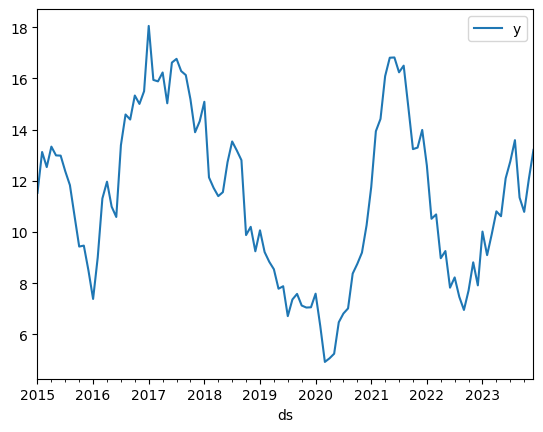

In [18]:
accion.plot(x='ds', y='y')

<Axes: ylabel='Frequency'>

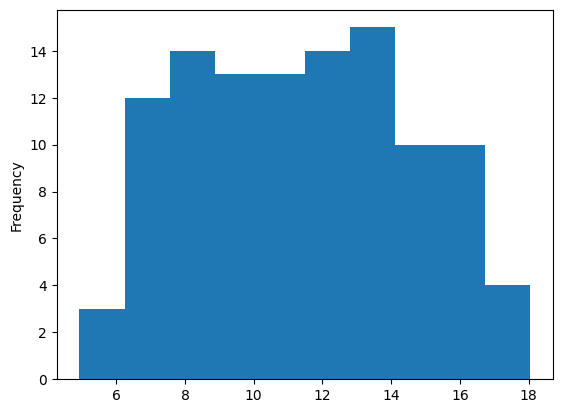

In [19]:
accion['y'].plot(kind='hist')

In [20]:
accion['y'].skew()

0.04941516379075995

In [21]:
accion['y_diff'] = accion['y'].diff()
accion['y_ret'] = accion['y'].pct_change()
accion.dropna(inplace=True)
accion.head()

<ipython-input-21-539dd89c613c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accion['y_diff'] = accion['y'].diff()
<ipython-input-21-539dd89c613c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accion['y_ret'] = accion['y'].pct_change()
<ipython-input-21-539dd89c613c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a

,ds,y,unique_id,y_diff,y_ret
757,2015-02-01,13.125944,CEMEXCPO.MX,1.594174,0.138242
758,2015-03-01,12.536795,CEMEXCPO.MX,-0.589149,-0.044884
759,2015-04-01,13.335611,CEMEXCPO.MX,0.798817,0.063718
760,2015-05-01,12.993212,CEMEXCPO.MX,-0.342400,-0.025676
761,2015-06-01,12.984201,CEMEXCPO.MX,-0.009010,-0.000693


<Axes: xlabel='ds'>

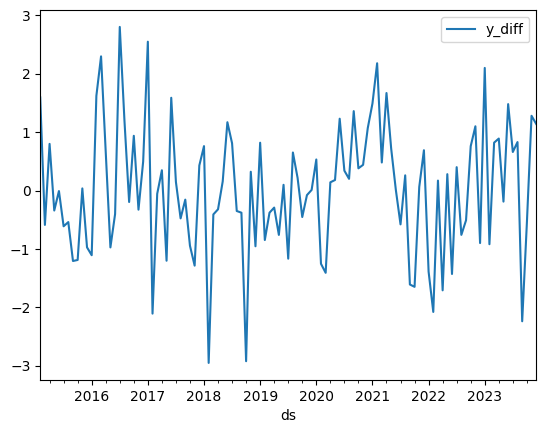

In [22]:
accion.plot(x='ds', y='y_diff')

<Axes: ylabel='Frequency'>

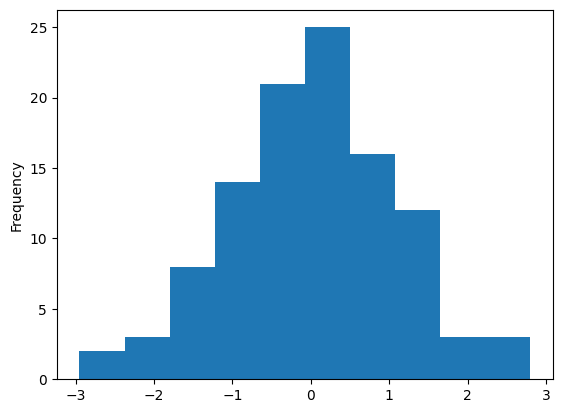

In [23]:
accion['y_diff'].plot(kind='hist')

In [24]:
accion['y_diff'].skew()

-0.09665258019203946

In [25]:
Augmented_Dickey_Fuller_Test_func(accion['y_diff'], 'CEMEXCPO.MX')

Dickey-Fuller test results for columns: CEMEXCPO.MX
Test Statistic                -9.545668e+00
p-value                        2.653511e-16
No Lags Used                   0.000000e+00
Number of observations used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
The data is stationary


In [26]:
Augmented_Dickey_Fuller_Test_func(accion['y'], 'CEMEXCPO.MX')

Dickey-Fuller test results for columns: CEMEXCPO.MX
Test Statistic                  -3.131970
p-value                          0.024276
No Lags Used                     6.000000
Number of observations used    100.000000
Critical Value (1%)             -3.497501
Critical Value (5%)             -2.890906
Critical Value (10%)            -2.582435
dtype: float64
Conclusion:====>
Reject the null hypothesis
The data is stationary


## Instantiating Model

In [27]:
pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.5/273.5 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 8.5 MB/s eta 0:00:00


In [28]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.arima import arima_string

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [29]:
season_length = 12 # Monthly data
horizon = len(test['ds'].unique()) # number of predictions

models = [AutoARIMA(season_length=season_length)]


In [30]:
sf = StatsForecast(df=train,
                   models=models,
                   freq='MS',
                   n_jobs=-1)

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [31]:
sf.fit()

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoARIMA])

In [33]:
test_hat = sf.forecast(fitted = True, h = horizon)

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [34]:
train_hat = sf.forecast_fitted_values()

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [35]:
test_hat.head()

,ds,AutoARIMA
unique_id,,
AC.MX,2023-01-01,147.468277
AC.MX,2023-02-01,147.468277
AC.MX,2023-03-01,147.468277
AC.MX,2023-04-01,147.468277
AC.MX,2023-05-01,147.468277


In [36]:
from sklearn import metrics
import numpy as np

In [37]:
def model_evaluation(y_true, y_pred, stocks):
    errors_df = pd.DataFrame(columns=['MAPE'], index=stocks)
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    for stock in stocks:
      y_true_stock = y_true[y_true['unique_id'] == stock]['y']
      y_pred_stock = y_pred[test_hat.index == stock]['AutoARIMA']
      print(f"MAPE score for {stock}: {mean_absolute_percentage_error(y_true_stock, y_pred_stock)}")
      errors_df.loc[stock, 'MAPE'] = mean_absolute_percentage_error(y_true_stock, y_pred_stock)

    return errors_df

In [38]:
errors_df = model_evaluation(test, test_hat, test['unique_id'].unique())

MAPE score for AC.MX: 7.90039777483902
MAPE score for ALSEA.MX: 30.63567692170678
MAPE score for AMXB.MX: 8.891540227666638
MAPE score for ASURB.MX: 9.972191933725133
MAPE score for BBAJIOO.MX: 25.2231259472649
MAPE score for BIMBOA.MX: 14.460478154118064
MAPE score for BOLSAA.MX: 5.793285337827014
MAPE score for CEMEXCPO.MX: 29.3075133206931
MAPE score for CHDRAUIB.MX: 18.269800465013734
MAPE score for CUERVO.MX: 11.547671232320807
MAPE score for GAPB.MX: 13.300969260084539
MAPE score for GCARSOA1.MX: 30.235093587112654
MAPE score for GCC.MX: 16.884977365621264
MAPE score for GENTERA.MX: 7.597672216765226
MAPE score for GFNORTEO.MX: 14.14530458249985
MAPE score for GMEXICOB.MX: 21.239208685442147
MAPE score for GRUMAB.MX: 10.200129832742947
MAPE score for KIMBERA.MX: 12.951515979114719
MAPE score for KOFUBL.MX: 9.71048063413853
MAPE score for LABB.MX: 14.127203645865583
MAPE score for MEGACPO.MX: 19.16699764077085
MAPE score for OMAB.MX: 19.833624039028038
MAPE score for ORBIA.MX: 9.5

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

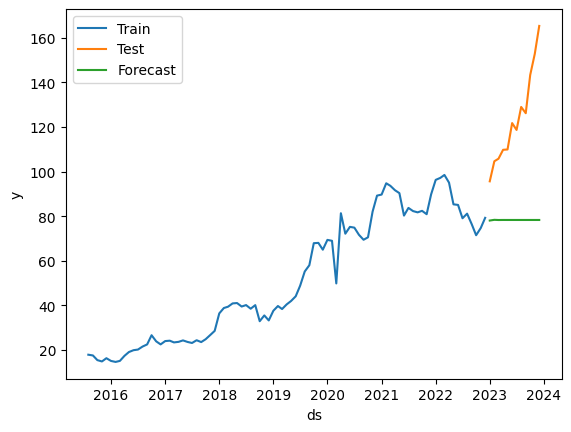

In [43]:
sns.lineplot(train[train['unique_id'] == 'Q.MX'], x="ds", y="y", label="Train")
sns.lineplot(test[test['unique_id'] == 'Q.MX'], x="ds", y="y", label="Test")
sns.lineplot(test_hat[test_hat.index == 'Q.MX'], x="ds", y="AutoARIMA", label="Forecast",)
plt.show()

In [44]:
arima_string(sf.fitted_[24,0].model_)

'ARIMA(1,1,0)                   '

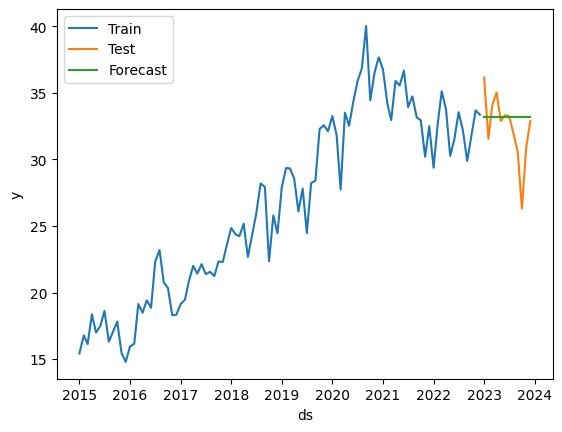

In [45]:
sns.lineplot(train[train['unique_id'] == 'BOLSAA.MX'], x="ds", y="y", label="Train")
sns.lineplot(test[test['unique_id'] == 'BOLSAA.MX'], x="ds", y="y", label="Test")
sns.lineplot(test_hat[test_hat.index == 'BOLSAA.MX'], x="ds", y="AutoARIMA", label="Forecast",)
plt.show()

In [46]:
arima_string(sf.fitted_[6,0].model_)

'ARIMA(0,1,1)                   '